### Autoencoders with Keras 

In [1]:
from keras.layers import Input, Dense 
from keras.models import Model 
from keras import regularizers


Using TensorFlow backend.


In [2]:
## Code dimension of 32 
encoding_dimension = 32 ## Compression factor of 784/32 == 24.5

In [3]:
input_img = Input(shape=(784,))


encoded = Dense(encoding_dimension, 
                activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)


decoded = Dense(784,activation='sigmoid')(encoded)


autoencoder = Model(input_img,decoded)

In [4]:
encoder = Model(input_img,encoded)

In [18]:
autoencoder.layers[-1]

In [5]:
encoded_input = Input(shape=(encoding_dimension,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist 
import numpy as np 
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [9]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
from keras.callbacks import TensorBoard

In [11]:
autoencoder.fit(x_train,
                x_train, 
                epochs=100,
                batch_size=256,
                shuffle=True, 
                validation_data=(x_test,x_test), 
                callbacks=[TensorBoard(log_dir='/tmp/autoencodersL1')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s - loss: 0.6828 - val_loss: 0.6607
Epoch 2/100
60000/60000 [==============================] - 2s - loss: 0.6440 - val_loss: 0.6273
Epoch 3/100
60000/60000 [==============================] - 2s - loss: 0.6112 - val_loss: 0.5953
Epoch 4/100
60000/60000 [==============================] - 2s - loss: 0.5802 - val_loss: 0.5656
Epoch 5/100
60000/60000 [==============================] - 2s - loss: 0.5519 - val_loss: 0.5387
Epoch 6/100
60000/60000 [==============================] - 2s - loss: 0.5264 - val_loss: 0.5146
Epoch 7/100
60000/60000 [==============================] - 2s - loss: 0.5037 - val_loss: 0.4933
Epoch 8/100
60000/60000 [==============================] - 2s - loss: 0.4836 - val_loss: 0.4744
Epoch 9/100
60000/60000 [==============================] - 2s - loss: 0.4658 - val_loss: 0.4577
Epoch 10/100
60000/60000 [==============================] - 2s - loss: 0.4501 - val_lo

60000/60000 [==============================] - 2s - loss: 0.2807 - val_loss: 0.2806
Epoch 86/100
60000/60000 [==============================] - 2s - loss: 0.2805 - val_loss: 0.2803
Epoch 87/100
60000/60000 [==============================] - 2s - loss: 0.2802 - val_loss: 0.2801
Epoch 88/100
60000/60000 [==============================] - 2s - loss: 0.2800 - val_loss: 0.2798
Epoch 89/100
60000/60000 [==============================] - 2s - loss: 0.2798 - val_loss: 0.2796
Epoch 90/100
60000/60000 [==============================] - 2s - loss: 0.2795 - val_loss: 0.2794
Epoch 91/100
60000/60000 [==============================] - 2s - loss: 0.2793 - val_loss: 0.2792
Epoch 92/100
60000/60000 [==============================] - 2s - loss: 0.2791 - val_loss: 0.2789
Epoch 93/100
60000/60000 [==============================] - 2s - loss: 0.2789 - val_loss: 0.2787
Epoch 94/100
60000/60000 [==============================] - 2s - loss: 0.2787 - val_loss: 0.2785
Epoch 95/100
60000/60000 [=================

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

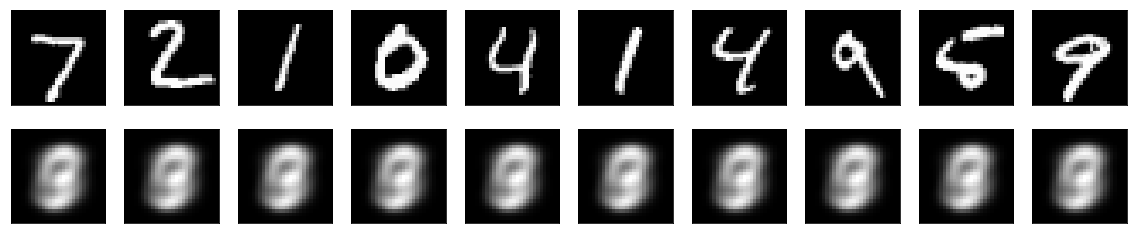

In [13]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()